## **Credit Card Fraud Detection Model using Self Organizing Map & Artifical Neural Network**





**Intuition:** We will be taking a sample from a Credit Approval dataset & then use that sample to detect some potential fraudsters with the help of a Self Organizing Map using the 'minisom' package. After that, we will create a dependent variable based on the list of potential fraudsters detected. Finally, we will create an Artificial Neural Network with Keras & use it to predict the probability of potential frauds corresponding to each customer.


**Notes:**

(1) The 'minisom' package can be installed with 'pip'

(2) We only took a sample from the data to lessen the computational time. The main dataset can also be used directly after tweaking the code accordingly.

(3) The 'customer_id' column is only created to be used as a refrence and is not really necessary to be added.

**Dataset Source:**
https://www.kaggle.com/mlg-ulb/creditcardfraud

## **Part 1:** Data preprocessing

### **Importing the libraries**

In [0]:
from google.colab import drive
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

### **Mounting Google Drive**

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Importing the dataset**

In [4]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SOM/creditcard.csv')
dataset.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

### **Creating a new column with randomly generated Customer IDs**

In [8]:
dataset['customer_id'] = np.random.randint(100000, 500000, size = len(dataset))
cols = ['customer_id', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7','V8', 'V9',
        'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 
        'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
        'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
dataset = dataset[cols]
dataset.head()

,customer_id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,138377,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,220192,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,276043,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,360161,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,335803,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### **Extracting 1000 Random Samples from the Main Dataset**

In [9]:
sampled_dataset = dataset.sample(n = 1000)
sampled_dataset.head()

,customer_id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
253553,352247,156309.0,1.981399,0.185255,-3.650571,0.472477,3.227775,3.064406,0.110535,0.659636,-0.016456,-0.336699,0.193482,0.041694,-0.484864,-0.780075,0.007393,-0.268799,0.889960,-0.033402,-0.505414,-0.138698,-0.030301,-0.005892,-0.007516,0.579525,0.505753,-0.472820,0.016482,-0.032189,24.81,0
89871,161669,62761.0,1.184980,-1.562447,1.636660,-0.119947,-2.215818,0.667241,-1.893293,0.446549,1.369551,0.217240,-2.116081,-1.161186,-1.710985,-1.335598,-1.441250,0.748530,0.897897,-0.782924,1.158079,0.067352,0.249439,0.937779,-0.265218,-0.063138,0.516223,0.128006,0.081299,0.032692,73.00,0
274419,401493,166000.0,-1.527155,0.170900,-0.116909,-0.417367,0.635782,-1.435035,0.827557,-0.357451,0.698918,0.461904,-1.003429,-0.428902,-0.992378,0.038490,-0.134832,-0.015578,-0.435619,-0.686190,0.037416,-0.673027,-0.471623,-0.563613,0.798725,0.013735,-0.305358,0.146980,0.034169,0.147651,2.25,0
201603,100320,133959.0,-1.122292,1.804898,-1.246749,-0.696037,1.251809,0.508361,-0.371747,-2.261847,-0.871901,-0.932831,-0.215352,1.344583,0.589481,1.046196,-1.247313,-0.395715,-0.289859,0.258751,0.966525,0.603396,-1.130747,0.863917,-0.253821,-0.164532,-0.036593,-0.244676,0.125635,0.205119,1.00,0
103685,145159,68762.0,-0.479516,0.356747,1.974170,-0.376257,-0.092452,0.618588,-0.217359,0.161026,0.555482,0.155061,-0.160528,-0.850359,-1.431053,-0.105780,0.937078,1.229569,-1.390534,1.654196,0.296108,-0.076741,0.280530,0.827117,-0.303968,-0.839495,-0.676149,0.365361,-0.271381,-0.079046,6.95,0


### **Separating the 'Class' feature**

In [10]:
X = sampled_dataset.iloc[:, :-1].values
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,352247.0,156309.0,1.981399,0.185255,-3.650571,0.472477,3.227775,3.064406,0.110535,0.659636,-0.016456,-0.336699,0.193482,0.041694,-0.484864,-0.780075,0.007393,-0.268799,0.889960,-0.033402,-0.505414,-0.138698,-0.030301,-0.005892,-0.007516,0.579525,0.505753,-0.472820,0.016482,-0.032189,24.81
1,161669.0,62761.0,1.184980,-1.562447,1.636660,-0.119947,-2.215818,0.667241,-1.893293,0.446549,1.369551,0.217240,-2.116081,-1.161186,-1.710985,-1.335598,-1.441250,0.748530,0.897897,-0.782924,1.158079,0.067352,0.249439,0.937779,-0.265218,-0.063138,0.516223,0.128006,0.081299,0.032692,73.00
2,401493.0,166000.0,-1.527155,0.170900,-0.116909,-0.417367,0.635782,-1.435035,0.827557,-0.357451,0.698918,0.461904,-1.003429,-0.428902,-0.992378,0.038490,-0.134832,-0.015578,-0.435619,-0.686190,0.037416,-0.673027,-0.471623,-0.563613,0.798725,0.013735,-0.305358,0.146980,0.034169,0.147651,2.25
3,100320.0,133959.0,-1.122292,1.804898,-1.246749,-0.696037,1.251809,0.508361,-0.371747,-2.261847,-0.871901,-0.932831,-0.215352,1.344583,0.589481,1.046196,-1.247313,-0.395715,-0.289859,0.258751,0.966525,0.603396,-1.130747,0.863917,-0.253821,-0.164532,-0.036593,-0.244676,0.125635,0.205119,1.00
4,145159.0,68762.0,-0.479516,0.356747,1.974170,-0.376257,-0.092452,0.618588,-0.217359,0.161026,0.555482,0.155061,-0.160528,-0.850359,-1.431053,-0.105780,0.937078,1.229569,-1.390534,1.654196,0.296108,-0.076741,0.280530,0.827117,-0.303968,-0.839495,-0.676149,0.365361,-0.271381,-0.079046,6.95


In [12]:
y = sampled_dataset.iloc[:, -1].values
pd.DataFrame(y).head()

,0
0,0
1,0
2,0
3,0
4,0


### **Feature Scaling**

In [13]:
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.630575,0.908183,0.991084,0.899815,0.611435,0.334491,0.330738,0.891396,0.690759,0.694798,0.340644,0.380272,0.555262,0.556909,0.399829,0.418499,0.421154,0.365925,0.232340,0.384448,0.412289,0.567529,0.379280,0.537045,0.559064,0.492678,0.645895,0.296416,0.414630,0.458269,0.009299
1,0.154030,0.363485,0.969502,0.864732,0.889115,0.296397,0.201681,0.803509,0.625968,0.681762,0.493031,0.435261,0.166587,0.377051,0.179928,0.353080,0.246322,0.492780,0.233068,0.277872,0.646502,0.584338,0.399629,0.744014,0.533694,0.382864,0.648196,0.454173,0.428479,0.464723,0.027361
2,0.753716,0.964610,0.896006,0.899527,0.797019,0.277273,0.269287,0.726433,0.713943,0.632575,0.419297,0.459548,0.353834,0.486544,0.308808,0.514894,0.403989,0.397500,0.110670,0.291627,0.488717,0.523940,0.347177,0.414723,0.638438,0.396000,0.467611,0.459155,0.418409,0.476158,0.000843
3,0.000625,0.778046,0.906977,0.932328,0.737681,0.259354,0.283892,0.797684,0.675165,0.516067,0.246590,0.321095,0.486459,0.751720,0.592509,0.633563,0.269728,0.350100,0.124048,0.425989,0.619532,0.628067,0.299231,0.727815,0.534816,0.365539,0.526686,0.356319,0.437952,0.481874,0.000375
4,0.112746,0.398427,0.924396,0.903258,0.906841,0.279916,0.252022,0.801725,0.680157,0.664294,0.403526,0.429088,0.495685,0.423527,0.230133,0.497905,0.533354,0.552763,0.023022,0.624409,0.525140,0.572583,0.401890,0.719743,0.529879,0.250206,0.386110,0.516494,0.353123,0.453608,0.002605


### **Training the SOM**

In [0]:
som = MiniSom(x = 10, y = 10, input_len = 31, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

### **Visualizing the results**

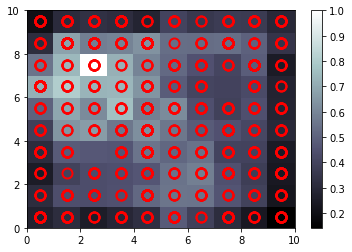

In [21]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

The (2, 7) node is surely an outlier and the customers clustered in that neuron are the potential fraudsters.

### **Finding the fraudsters**

In [22]:
mappings = som.win_map(X)
frauds = mappings[(2, 7)]
frauds = sc.inverse_transform(frauds)
fraudsters = pd.DataFrame(frauds)
fraudsters.columns = ['customer_id', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
                      'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 
                      'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 
                      'V26', 'V27', 'V28', 'Amount']
fraudsters

,customer_id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,417209.0,142323.0,-2.115428,-0.356423,-3.719861,0.656568,-7.892220,2.611464,8.115545,-0.789151,-0.904982,-2.544300,0.225305,-0.138968,0.428770,-0.359836,0.796916,0.722632,0.791262,0.704245,-0.753352,0.156679,0.324233,1.216345,1.417695,0.906605,-0.100475,-0.174178,0.729505,-0.366921,1845.81
1,180681.0,145904.0,-1.326713,0.649403,-3.818230,-2.114035,-10.722687,6.026615,9.674628,-2.731137,1.042109,-1.510719,0.568384,-0.311650,-0.416244,-0.319877,-0.007690,1.875562,-1.641352,0.749190,-0.383020,-3.339235,0.153870,1.328389,-0.437222,-0.049816,-2.249449,0.276496,1.202437,-0.822944,2088.00
2,252304.0,39138.0,-2.948199,-3.113410,-0.751727,-0.914998,-3.432860,1.161925,4.018882,-0.003248,-2.304612,-1.271708,0.680086,0.037912,0.830897,0.121789,-1.503389,1.347734,0.062355,-0.551259,0.365018,2.708991,0.995586,0.454418,2.361695,-0.069749,1.420331,-0.185002,-0.593091,-0.093805,1200.00
3,338520.0,56427.0,-1.295631,-0.609158,0.652955,1.340946,-1.607694,0.373082,2.852770,-0.276567,-0.985335,-0.813173,0.215089,0.126594,0.302795,0.411027,1.233781,-0.659800,0.219704,-0.303990,-0.279026,1.298152,0.583004,0.702820,1.355469,0.558617,-0.141912,-0.358738,-0.019109,0.211247,614.10
4,453564.0,32674.0,-8.108444,-6.803067,-1.221330,0.140158,-5.251149,3.977291,6.195621,-2.379155,1.104709,1.325456,2.089125,-0.539110,0.094206,-2.417577,-0.092852,1.757298,-0.178962,-2.414106,0.753855,-6.512620,-2.320990,0.990359,-0.218009,0.120944,0.735611,-0.243044,-0.795626,3.287298,1481.74
5,326573.0,151579.0,-3.204030,-9.381823,-3.991731,0.920507,-2.432941,2.475750,2.442080,-0.088620,1.160074,-1.553717,0.893585,0.684618,-0.289517,0.947351,1.770902,0.182886,-0.078592,0.148469,-1.279562,5.162657,1.860382,-0.518024,-2.131111,-0.762765,-1.481573,0.505958,-0.506516,0.388478,2668.00
6,449415.0,73457.0,-3.305218,-7.172688,-2.813947,3.029481,-1.814998,0.957197,3.421911,-0.715084,-0.322254,-1.176477,-0.964187,0.752231,1.421585,0.562575,0.489041,-0.160505,-0.125537,-0.253973,-0.933089,4.700579,1.379742,-1.142250,-2.314699,-0.601968,0.045135,-0.434085,-0.414941,0.415110,2364.68


The above table gives us the list of all the potential fraudsters.

## **Part 3:** Using Artificial Neural Network to predict the probabilities of fraud.

### **Creating a dependent variable**

In [23]:
is_fraud = np.zeros(len(sampled_dataset))
for i in range(len(sampled_dataset)):
    if sampled_dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1
pd.DataFrame(is_fraud)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
995,0.0
996,0.0
997,0.0
998,0.0


### **Creating & Feature Scaling the Matrix of Features**

In [0]:
customers = X.copy()
sc = StandardScaler()
customers = sc.fit_transform(customers)

### **Building an ANN & training it over the Matrix of Features & the new Dependent Variable**

In [28]:
classifier = Sequential()
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 31))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 20)

Epoch 1/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1922 - acc: 0.9930
Epoch 2/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0157 - acc: 0.9940
Epoch 3/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0106 - acc: 0.9940
Epoch 4/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0086 - acc: 0.9940
Epoch 5/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0076 - acc: 0.9940
Epoch 6/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0062 - acc: 0.9940
Epoch 7/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0073 - acc: 0.9940
Epoch 8/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0060 - acc: 0.9940
Epoch 9/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0054 - acc: 0.9940
Epoch 10/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0049 - acc: 0.9940
Epoch 11/20
1000/1000 [======

### **Predicting the Probabilities of Frauds**

In [29]:
y_pred = classifier.predict(customers)
y_pred = np.concatenate((sampled_dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]
pd.DataFrame(y_pred)

,0,1
0,164360.0,0.000000
1,401483.0,0.000000
2,334406.0,0.000000
3,167496.0,0.000000
4,144490.0,0.000000
...,...,...
995,252304.0,0.661621
996,449415.0,0.661621
997,180681.0,0.661621
998,417209.0,0.661621


### **Exporting the Predictions with corresponding Customer IDs as a CSV File**

In [0]:
pd.DataFrame(y_pred).to_csv('/content/drive/My Drive/Colab Notebooks/SOM/fraud.csv')

The exported .CSV file contains the list of all the customers(from the sampled dataset only) with the probabilities of committing fraud.